Modelos de redes neuronales Regresión Presentados por Laura Leyva

In [18]:
# Importar Librerías
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Paso 1. Carga Conjunto de Datos

In [2]:
df = pd.read_csv("weather_classification_data.csv")

## Paso 2. Visualización de una Muestra

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.shape

(13200, 11)

In [5]:
df = df.dropna()

## Paso 3. Codificar datos

In [6]:
df = df.dropna()

# Inicializar LabelEncoder
label_encoders = {}

# Codificar las columnas 'Cloud Cover', 'Season', 'Location' y 'Weather Type' con LabelEncoder
columns_to_encode = ['Cloud Cover', 'Season', 'Location','Weather Type']

for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


X = df.drop('Weather Type', axis=1)  # Features
y = df['Weather Type']  # Target

## Paso 4. Construcción del Modelo

In [7]:
# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],),kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1))  # Capa de salida para regresión (una salida)

In [8]:
#Dividir datos en entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid =train_test_split(X_train_full, y_train_full)

print('X_train:',X_train.shape)
print('X_test:' ,X_test.shape)
print('X_valid:',X_valid.shape)
print('y_train:',y_train.shape)
print('y_test:' ,y_test.shape)
print('y valid:',y_valid.shape)

X_train: (7920, 10)
X_test: (2640, 10)
X_valid: (2640, 10)
y_train: (7920,)
y_test: (2640,)
y valid: (2640,)


In [9]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

## Paso 5.Compilación del Modelo

In [10]:
# Compilar el modelo:
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

## Paso 6. Entrenamiento del Modelo

In [11]:
# Entrenar el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit (X_train, y_train,epochs=250,validation_data=(X_valid, y_valid))

Epoch 1/250
248/248 [==============================] - 3s 3ms/step - loss: 1.1260 - root_mean_squared_error: 1.0266 - mean_absolute_percentage_error: 258969216.0000 - val_loss: 0.7072 - val_root_mean_squared_error: 0.7975 - val_mean_absolute_percentage_error: 215208800.0000
Epoch 2/250
248/248 [==============================] - 1s 2ms/step - loss: 0.8608 - root_mean_squared_error: 0.8889 - mean_absolute_percentage_error: 261286336.0000 - val_loss: 0.5733 - val_root_mean_squared_error: 0.7093 - val_mean_absolute_percentage_error: 221107968.0000
Epoch 3/250
248/248 [==============================] - 1s 2ms/step - loss: 0.7981 - root_mean_squared_error: 0.8535 - mean_absolute_percentage_error: 255989008.0000 - val_loss: 0.5791 - val_root_mean_squared_error: 0.7141 - val_mean_absolute_percentage_error: 209022112.0000
Epoch 4/250
248/248 [==============================] - 1s 2ms/step - loss: 0.7581 - root_mean_squared_error: 0.8302 - mean_absolute_percentage_error: 244838160.0000 - val_loss

## Paso 7. Gráfica Historial de Entrenamiento

<Axes: >

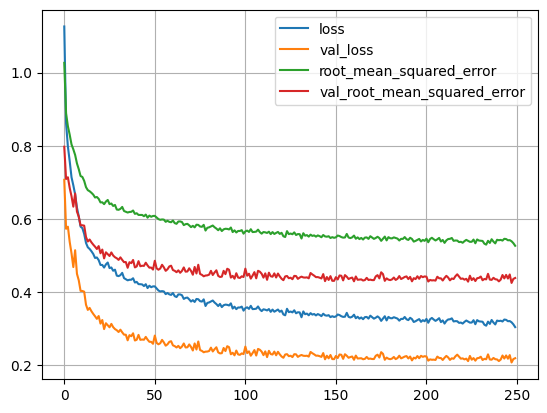

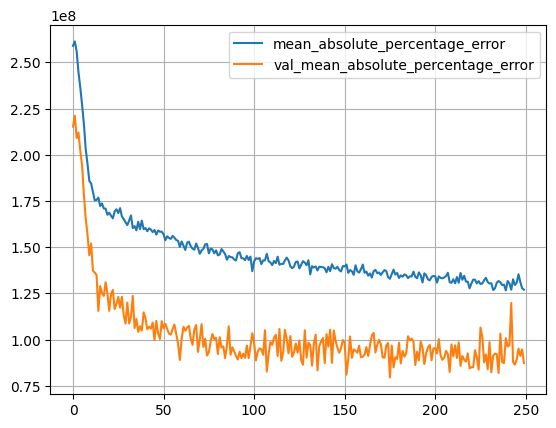

In [12]:
# Graficar el historial de entrenamiento:

dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot (grid=True)

## Paso 8. Evaluar el Modelo

In [13]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)

print("root_mean_squared_error train:", RMSE)

print("mean_absolute_percentage_error train:", MAPE)
# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validacion")
print("loss valid:", loss)
print("root_mean_squared error valid:", RMSE)

print("mean_absolute_percentage_error valid:", MAPE)
# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)

print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)

248/248 [==============================] - 1s 2ms/step - loss: 0.1900 - root_mean_squared_error: 0.4036 - mean_absolute_percentage_error: 89293392.0000
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.19004744291305542
root_mean_squared_error train: 0.403601735830307
mean_absolute_percentage_error train: 89293392.0
83/83 [==============================] - 0s 2ms/step - loss: 0.2199 - root_mean_squared_error: 0.4390 - mean_absolute_percentage_error: 87272432.0000
Evaluar el modelo en el conjunto de validacion
loss valid: 0.21985428035259247
root_mean_squared error valid: 0.43897745013237
mean_absolute_percentage_error valid: 87272432.0
83/83 [==============================] - 0s 2ms/step - loss: 0.2371 - root_mean_squared_error: 0.4581 - mean_absolute_percentage_error: 91577648.0000
Evaluar el modelo en el conjunto de prueba
loss test: 0.23705315589904785
root_mean_squared_error test: 0.4581485390663147
mean_absolute_percentage_error test: 91577648.0


83/83 [==============================] - 0s 1ms/step


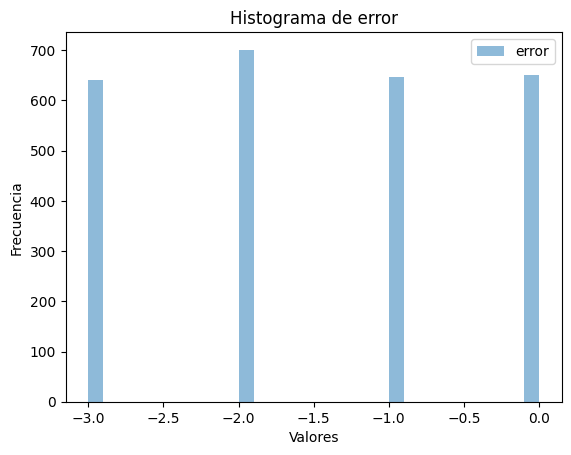

In [17]:
# Predicciones en el conjunto de prueba
y_pred = np.argmax(model.predict(X_test), axis=-1)

error = y_pred-y_test
# Graficar el histograma de y_pred
plt.hist(error, bins=30, alpha=0.5, label='error')

# Añadir títulos y etiquetas
plt.title('Histograma de error')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

In [19]:
# Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

# Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)

# Error Porcentual Absoluto Medio (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Métricas
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Coeficiente de Determinación (R²): {r2}')
print(f'Error Porcentual Absoluto Medio (MAPE): {mape}%')

Error Cuadrático Medio (MSE): 3.492424242424242
Raíz del Error Cuadrático Medio (RMSE): 1.8688028902011689
Error Absoluto Medio (MAE): 1.5045454545454546
Coeficiente de Determinación (R²): -1.8422179500832319
Error Porcentual Absoluto Medio (MAPE): 100.0%
